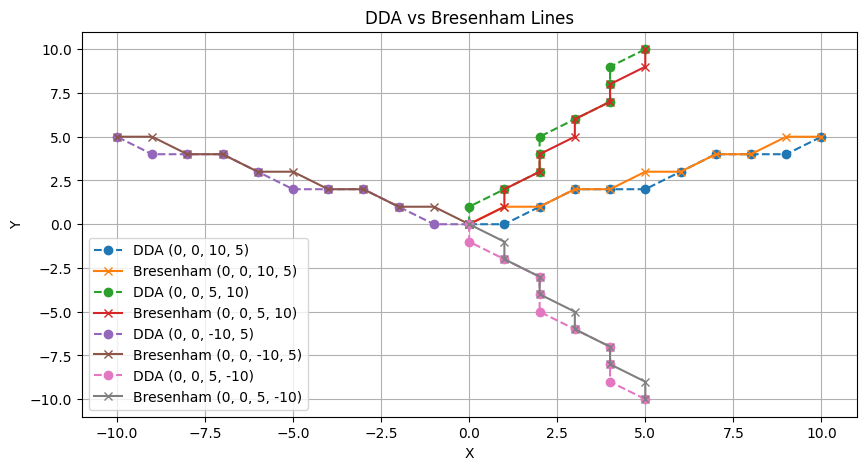

DDA uses: 1 multiplication and 1 addition per step
Bresenham uses: only integer addition per step (more efficient)


In [1]:
import matplotlib.pyplot as plt

# DDA algorithm
def dda(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    steps = max(abs(dx), abs(dy))
    x_inc = dx / steps
    y_inc = dy / steps
    x_coords, y_coords = [], []
    for i in range(int(steps) + 1):
        x_coords.append(round(x0 + i*x_inc))
        y_coords.append(round(y0 + i*y_inc))
    return x_coords, y_coords

# Bresenham’s line algorithm
def bresenham(x0, y0, x1, y1):
    x_coords, y_coords = [], []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else -1
    if dy <= dx:
        p = 2*dy - dx
        y = y0
        for x in range(x0, x1 + sx, sx):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                y += sy
                p += 2*(dy - dx)
            else:
                p += 2*dy
    else:
        p = 2*dx - dy
        x = x0
        for y in range(y0, y1 + sy, sy):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                x += sx
                p += 2*(dx - dy)
            else:
                p += 2*dx
    return x_coords, y_coords

# Draw lines for different octants
octants = [
    (0,0,10,5),   # m<1
    (0,0,5,10),   # m>1
    (0,0,-10,5),  # negative X
    (0,0,5,-10),  # negative Y
]

plt.figure(figsize=(10,5))
for line in octants:
    x0,y0,x1,y1 = line
    xd, yd = dda(x0,y0,x1,y1)
    xb, yb = bresenham(x0,y0,x1,y1)
    plt.plot(xd, yd, marker='o', linestyle='--', label=f"DDA {line}")
    plt.plot(xb, yb, marker='x', linestyle='-', label=f"Bresenham {line}")

plt.title("DDA vs Bresenham Lines")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()

# Simple comparison of operations
print("DDA uses: 1 multiplication and 1 addition per step")
print("Bresenham uses: only integer addition per step (more efficient)")
